<a href="https://colab.research.google.com/github/samarkinav/RF-vs-GB/blob/main/RF_vs_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn import ensemble, metrics, model_selection

import pandas as pd
import numpy as np
import xgboost as xgb

In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
biorespance = pd.read_csv('https://raw.githubusercontent.com/samarkinav/RF-vs-GB/main/_3332ad722fa992447b07c4002f630a5a_bioresponse.csv')

In [11]:
biorespance.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
biorespance_target = biorespance.Activity

In [16]:
biorespance_data = biorespance.iloc[:,1:]

## Random Forest

Зависимость качества модели от количества деревьев

In [43]:
n_trees = range(1, 56, 5)

In [44]:
%%time
scoring = []
for n_tree in n_trees:
  estimator = ensemble.RandomForestClassifier(n_estimators=n_tree, min_samples_split=5)
  score = model_selection.cross_val_score(estimator, biorespance_data, biorespance_target, scoring='accuracy', cv=3)

  scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 14.3 s, sys: 59.6 ms, total: 14.4 s
Wall time: 14.4 s


In [45]:
scoring

matrix([[0.68265388, 0.6616    , 0.6896    ],
        [0.7529976 , 0.7184    , 0.7648    ],
        [0.76258993, 0.7496    , 0.7856    ],
        [0.78017586, 0.7656    , 0.7896    ],
        [0.78417266, 0.7696    , 0.7904    ],
        [0.78177458, 0.776     , 0.7856    ],
        [0.78657074, 0.7832    , 0.7896    ],
        [0.79056755, 0.7704    , 0.7992    ],
        [0.7873701 , 0.7752    , 0.8       ],
        [0.77777778, 0.7712    , 0.8056    ],
        [0.78577138, 0.784     , 0.7976    ]])

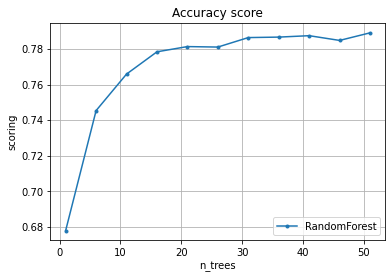

In [46]:
pylab.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('scoring')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')


Кривые обучения для деревьев большей глубины

In [47]:
%%time
xgb_scoring = []
for n_tree in n_trees:
  estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
  score = model_selection.cross_val_score(estimator, biorespance_data, biorespance_target, scoring='accuracy', cv=3)

  xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 2min 18s, sys: 247 ms, total: 2min 18s
Wall time: 2min 18s


In [48]:
xgb_scoring

matrix([[0.76498801, 0.756     , 0.756     ],
        [0.77697842, 0.7632    , 0.7656    ],
        [0.77777778, 0.772     , 0.772     ],
        [0.78177458, 0.7712    , 0.7768    ],
        [0.7833733 , 0.7776    , 0.7768    ],
        [0.79216627, 0.7752    , 0.7808    ],
        [0.79696243, 0.78      , 0.78      ],
        [0.79376499, 0.78      , 0.7784    ],
        [0.79456435, 0.7856    , 0.7792    ],
        [0.79936051, 0.7832    , 0.7848    ],
        [0.79776179, 0.784     , 0.784     ]])

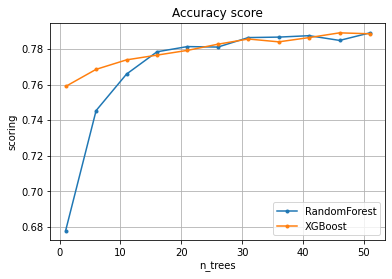

In [49]:
pylab.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis=1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('scoring')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')